In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
ds1 = pd.read_csv('./dataset1.csv')
ds2 = pd.read_csv('./dataset2.csv')
ds3 = pd.read_csv('./dataset3.csv')

In [3]:
# View the first few rows of each dataset
print(ds1.head())
print("\n")
print(ds2.head())
print("\n")
print(ds3.head())

        ID  gender  minority  deprived
0  1087360       0         0         0
1  1088938       0         1         0
2  1088953       0         1         0
3  1088961       0         1         0
4  1089147       0         1         0


        ID  C_we  C_wk  G_we  G_wk  S_we  S_wk  T_we  T_wk
0  1000002   0.5   0.5   0.0   0.0   1.0   0.5   1.0   0.5
1  1000003   1.0   0.5   0.0   0.0   2.0   2.0   3.0   2.0
2  1000004   3.0   1.0   2.0   0.0   3.0   2.0   3.0   2.0
3  1000005   4.0   2.0   0.0   0.0   4.0   3.0   7.0   5.0
4  1000006   1.0   0.5   0.0   0.0   2.0   2.0   1.0   0.5


        ID  Optm  Usef  Relx  Intp  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  \
0  1087360     5     3     2     1     3       5       4       1      5     2   
1  1094049     2     3     3     2     3       1       2       1      5     1   
2  1094067     4     3     4     4     4       4       4       3      4     4   
3  1097484     3     3     3     3     3       3       3       3      3     3   
4  

In [4]:
# Merging datasets on a common column
merged_data = pd.merge(ds1, ds2, on='ID')
merged_data = pd.merge(merged_data, ds3, on='ID')

# Check the resulting merged dataset
print(merged_data.head())


        ID  gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  \
0  1087192       0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   
1  1087195       0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   
2  1087205       0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   
3  1087214       0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   
4  1087222       0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   

   ...  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  \
0  ...     4       4       4       4      5     4       4      5       4   
1  ...     3       4       5       3      5     4       4      5       4   
2  ...     3       3       3       3      4     3       3      3       4   
3  ...     4       4       4       4      3     5       4      5       4   
4  ...     2       3       3       4      4     3       5      5       5   

   Cheer  
0      4  
1      4  
2      4  
3      4  
4      5  

[5 rows

# Descriptive Statistical Analysis

## Dataset 1

In [7]:
# Descriptive statistics for the merged dataset
print("Descriptive Statistics for Dataset 1:\n\n")

# Value counts for categorical variables
print("\tGender distribution:")
print(ds1['gender'].value_counts())
print("\n")

print("\tMinority distribution:")
print(ds1['minority'].value_counts())
print("\n")

print("\tDeprivation distribution:")
print(ds1['deprived'].value_counts())
print("\n")

Descriptive Statistics for Dataset 1:


	Gender distribution:
gender
0    62962
1    57153
Name: count, dtype: int64


	Minority distribution:
minority
0    91196
1    28919
Name: count, dtype: int64


	Deprivation distribution:
deprived
0    67889
1    52226
Name: count, dtype: int64




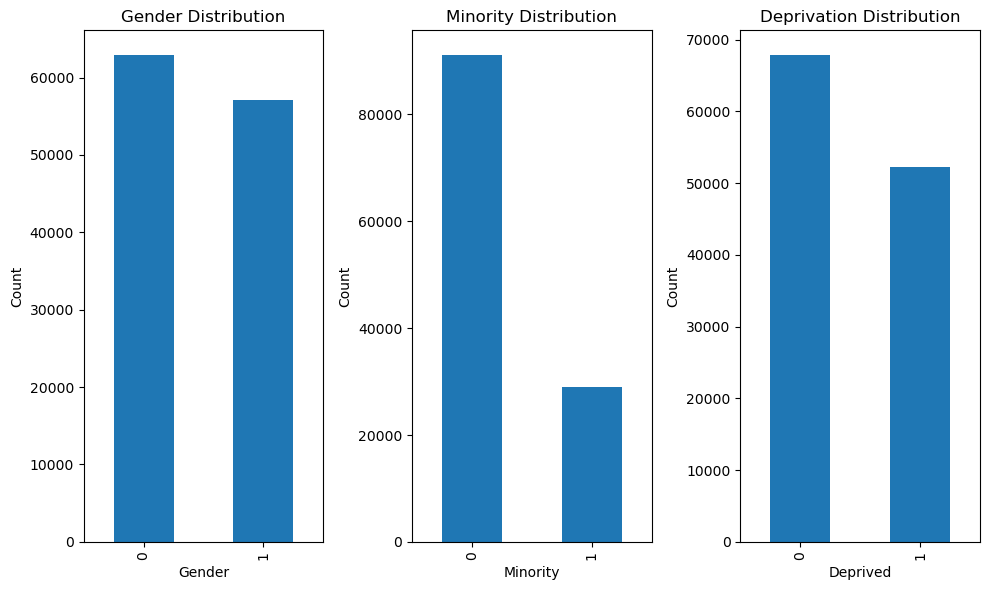

In [8]:
# Bar charts for categorical variables
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
ds1['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
ds1['minority'].value_counts().plot(kind='bar')
plt.title('Minority Distribution')
plt.xlabel('Minority')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
ds1['deprived'].value_counts().plot(kind='bar')
plt.title('Deprivation Distribution')
plt.xlabel('Deprived')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Dataset 2

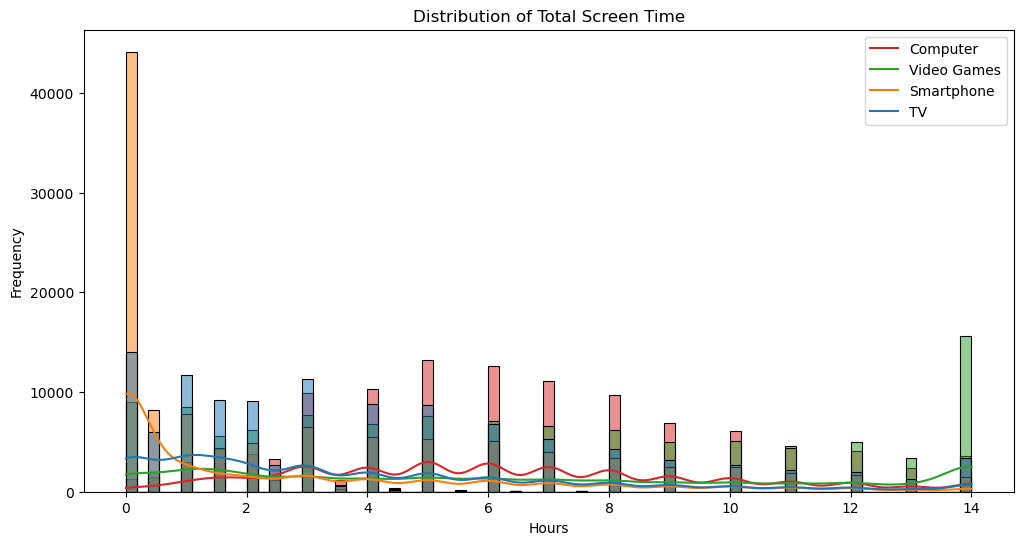

In [10]:
# Calculate total screen time
ds2['Total_Computer_We'] = ds2['C_we'] + ds2['C_wk']
ds2['Total_Video_Games'] = ds2['G_we'] + ds2['G_wk']
ds2['Total_Smartphone'] = ds2['S_we'] + ds2['S_wk']
ds2['Total_TV'] = ds2['T_we'] + ds2['T_wk']

# Visualize total screen time
plt.figure(figsize=(12, 6))
sns.histplot(ds2[['Total_Computer_We', 'Total_Video_Games', 'Total_Smartphone', 'Total_TV']], kde=True)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.legend(['Computer', 'Video Games', 'Smartphone', 'TV'])
plt.show()

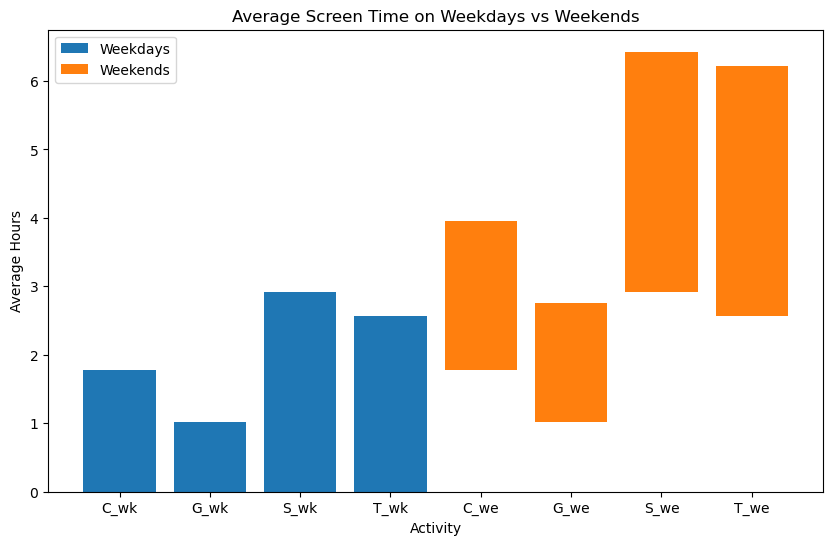

In [11]:
# Diagram on using during weekdays vs weekends

import matplotlib.pyplot as plt
# Group data by weekdays and weekends and calculate average screen time
weekday_avg = ds2[['C_wk', 'G_wk', 'S_wk', 'T_wk']].mean()
weekend_avg = ds2[['C_we', 'G_we', 'S_we', 'T_we']].mean()

# Visualize the Distribution
plt.figure(figsize=(10, 6))
plt.bar(weekday_avg.index, weekday_avg.values, label='Weekdays')
plt.bar(weekend_avg.index, weekend_avg.values, bottom=weekday_avg.values, label='Weekends')
plt.title('Average Screen Time on Weekdays vs Weekends')
plt.xlabel('Activity')
plt.ylabel('Average Hours')
plt.legend()
plt.show()

## Dataset 3

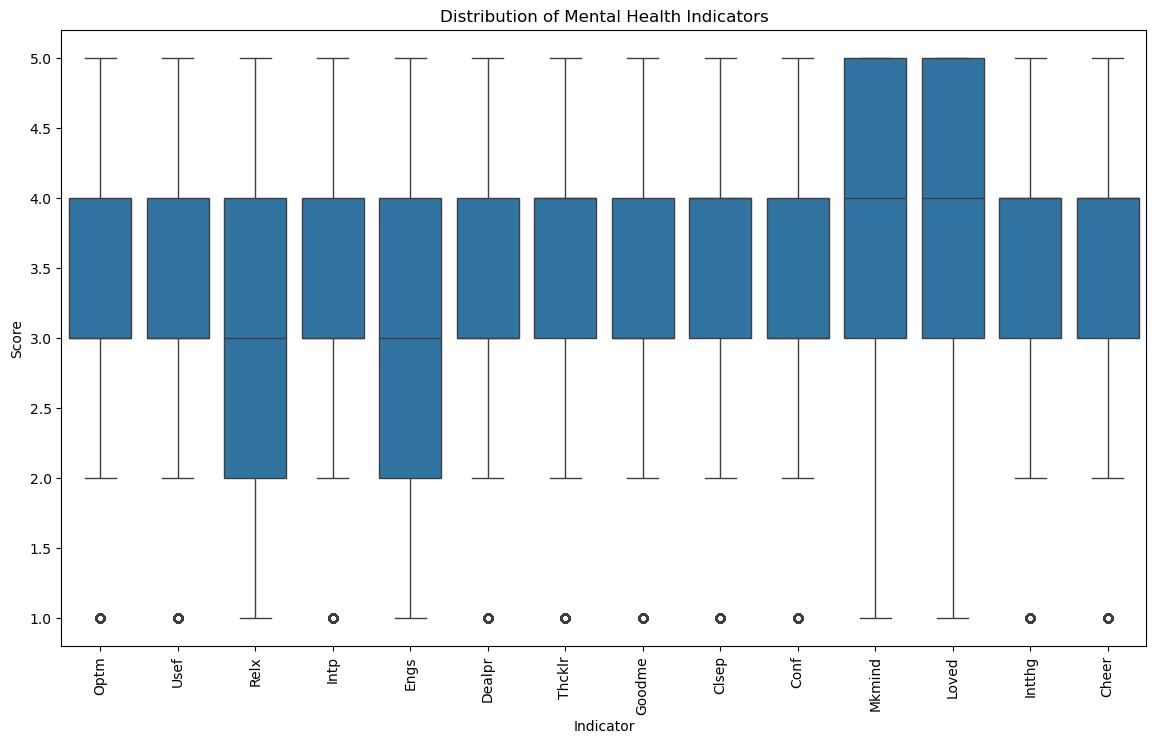

In [13]:
# Visualize the distribution
ds3_melted = ds3.melt(id_vars='ID', var_name='Indicator', value_name='Score')
plt.figure(figsize=(14, 8))
sns.boxplot(x='Indicator', y='Score', data=ds3_melted)
plt.title('Distribution of Mental Health Indicators')
plt.xticks(rotation=90)
plt.show()

# Inferential Statistical Analysis

In [15]:

# Merge datasets for analysis
merged_ds = pd.merge(ds2, ds1[['ID', 'deprived']], on='ID')

# Compare screen time between deprived and non-deprived groups
deprived = merged_ds[merged_ds['deprived'] == 1]
non_deprived = merged_ds[merged_ds['deprived'] == 0]

# Import the necessary library
import scipy.stats as stats # Import the stats module from scipy

# Perform t-tests for each type of screen time
for column in ['Total_Computer_We', 'Total_Video_Games', 'Total_Smartphone', 'Total_TV']:
    t_stat, p_val = stats.ttest_ind(deprived[column], non_deprived[column], nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat:.2f}, p-value = {p_val:.3f}')


T-test for Total_Computer_We: t-statistic = 13.19, p-value = 0.000
T-test for Total_Video_Games: t-statistic = 15.53, p-value = 0.000
T-test for Total_Smartphone: t-statistic = 29.87, p-value = 0.000
T-test for Total_TV: t-statistic = 33.55, p-value = 0.000


In [16]:
# Calculate correlations
mental_health_columns = ds3.columns[1:]  # Exclude 'ID'
screen_time_columns = ['Total_Computer_We', 'Total_Video_Games', 'Total_Smartphone', 'Total_TV']

# Merge datasets for correlation analysis
merged_ds2 = pd.merge(ds2, ds1[['ID', 'deprived']], on='ID')
merged_ds3 = pd.merge(merged_ds2, ds3[['ID'] + list(mental_health_columns)], on='ID')

# Compute correlations
for column in screen_time_columns:
    for mh_column in mental_health_columns:
        corr, p_val = stats.pearsonr(merged_ds3[column], merged_ds3[mh_column])
        print(f'Correlation between {column} and {mh_column}: correlation = {corr:.2f}, p-value = {p_val:.3f}')

Correlation between Total_Computer_We and Optm: correlation = -0.02, p-value = 0.000
Correlation between Total_Computer_We and Usef: correlation = -0.04, p-value = 0.000
Correlation between Total_Computer_We and Relx: correlation = -0.07, p-value = 0.000
Correlation between Total_Computer_We and Intp: correlation = 0.00, p-value = 0.712
Correlation between Total_Computer_We and Engs: correlation = -0.05, p-value = 0.000
Correlation between Total_Computer_We and Dealpr: correlation = -0.06, p-value = 0.000
Correlation between Total_Computer_We and Thcklr: correlation = -0.07, p-value = 0.000
Correlation between Total_Computer_We and Goodme: correlation = -0.08, p-value = 0.000
Correlation between Total_Computer_We and Clsep: correlation = -0.03, p-value = 0.000
Correlation between Total_Computer_We and Conf: correlation = -0.06, p-value = 0.000
Correlation between Total_Computer_We and Mkmind: correlation = -0.05, p-value = 0.000
Correlation between Total_Computer_We and Loved: correlat

# Relation Between Datasets

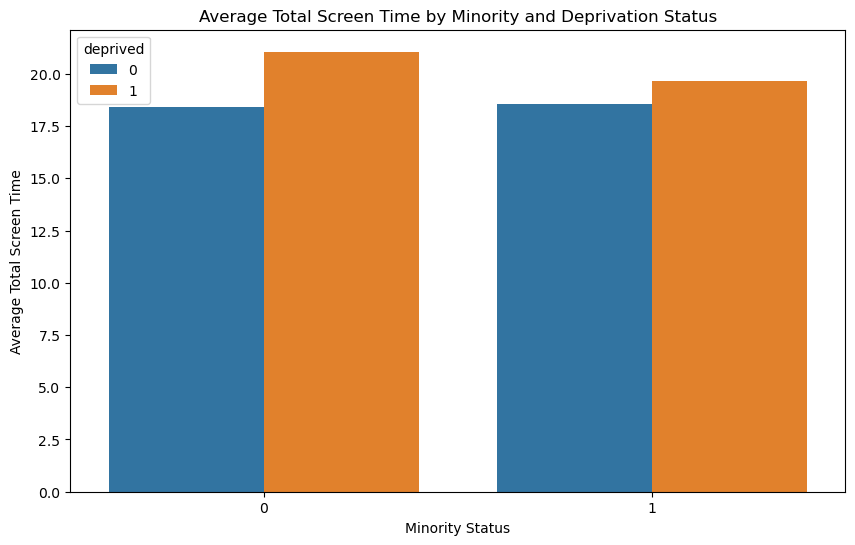

In [18]:
# Calculate total screen time for each individual
ds2['Total_Screen_Time'] = ds2[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].sum(axis=1)

# Merge relevant columns from df1 and df2
ds_merged = pd.merge(ds1[['ID', 'minority', 'deprived']], ds2[['ID', 'Total_Screen_Time']], on='ID')

# Group by minority and deprived status and calculate average total screen time
grouped = ds_merged.groupby(['minority', 'deprived'])['Total_Screen_Time'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='minority', y='Total_Screen_Time', hue='deprived', data=grouped)
plt.title('Average Total Screen Time by Minority and Deprivation Status')
plt.xlabel('Minority Status')
plt.ylabel('Average Total Screen Time')
plt.show()

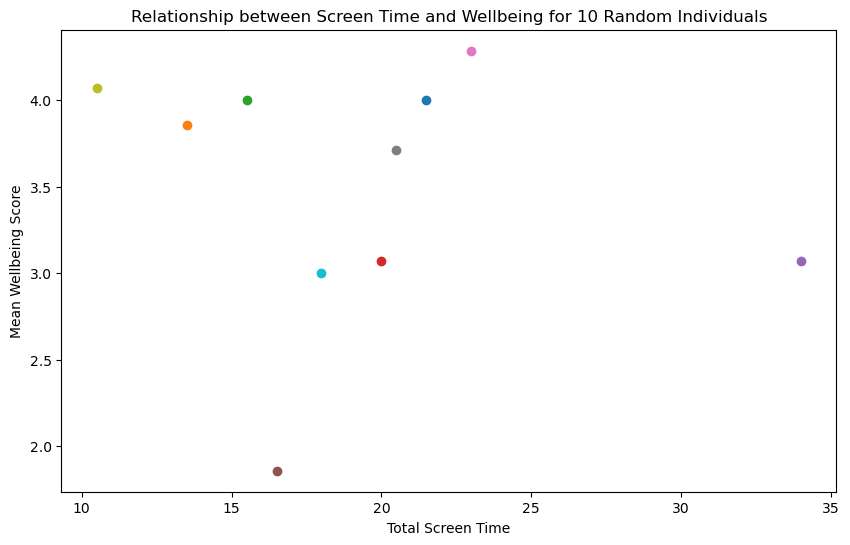

In [19]:
# Calculate total screen time for each individual in df2
ds2['Total_Screen_Time'] = ds2[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].sum(axis=1)

# Calculate mean wellbeing score for each individual in df3
ds3['Mean_Wellbeing'] = ds3[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']].mean(axis=1)

# Merge the relevant data from df2 and df3
ds_merged = pd.merge(ds2[['ID', 'Total_Screen_Time']], ds3[['ID', 'Mean_Wellbeing']], on='ID')

# Select 10 random individuals
import random
random_ids = random.sample(list(ds_merged['ID']), 10)
ds_sample = ds_merged[ds_merged['ID'].isin(random_ids)]

# Plot the relationship between total screen time and mean wellbeing for the sampled individuals
plt.figure(figsize=(10, 6))
for _, row in ds_sample.iterrows():
  plt.plot(row['Total_Screen_Time'], row['Mean_Wellbeing'], marker='o')
plt.xlabel('Total Screen Time')
plt.ylabel('Mean Wellbeing Score')
plt.title('Relationship between Screen Time and Wellbeing for 10 Random Individuals')
plt.show()

# Project Objective 2

# Linear Regression Model

Mean Squared Error (MSE): 0.4544219204590748
R-squared (R2) Score: 0.012606863045506955


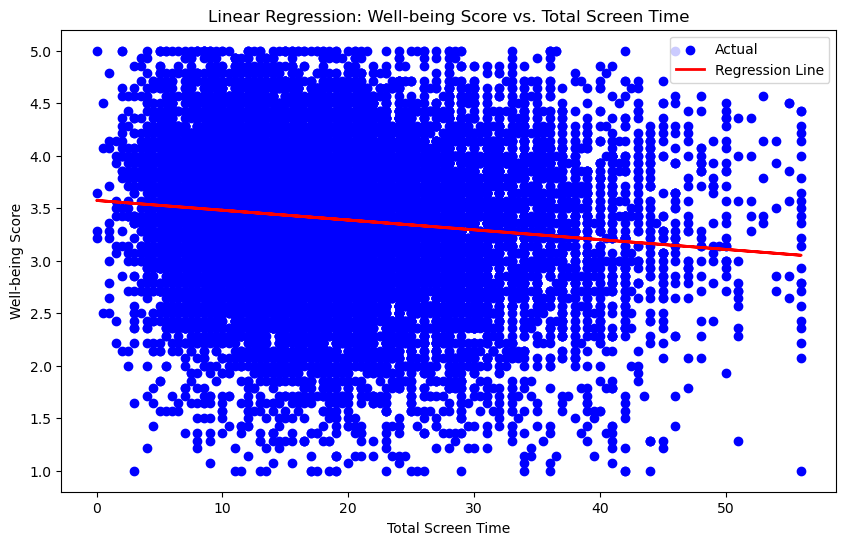

In [29]:
# Create a new column for total screen time (sum of all screen time-related activities)
cleaned_data['total_screen_time'] = (
    cleaned_data['C_we'] + cleaned_data['C_wk'] +
    cleaned_data['G_we'] + cleaned_data['G_wk'] +
    cleaned_data['S_we'] + cleaned_data['S_wk'] +
    cleaned_data['T_we'] + cleaned_data['T_wk']
)

# Optional: Create an average well-being score by averaging all well-being columns
cleaned_data['well_being_score'] = (
    cleaned_data[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 
                  'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 
                  'Loved', 'Intthg', 'Cheer']].mean(axis=1)
)

# Feature Engineering: Define the independent variable (total screen time) and dependent variable (well-being score)
X = cleaned_data[['total_screen_time']]
y = cleaned_data['well_being_score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Visualize the regression line with the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Total Screen Time')
plt.ylabel('Well-being Score')
plt.title('Linear Regression: Well-being Score vs. Total Screen Time')
plt.legend()
plt.show()
